<section class='universityLogo' style='display: inline-block; margin: 0 2em'>
<img src='https://www.hse.ru/data/2012/01/19/1263884289/logo_%D1%81_hse_cmyk_e.png' width="90px">
</section>

<section id='text' style='display:inline-block'>
<div class='title' align = 'center' style='font-style: italic'>
    Скрипт эмпирической части выпускной квалификационной работы
</div>
<div id='cwName' style='margin: 10px auto; color: #23C7ED'>
    <div id='cwNameMain' align = 'center' style='font-size: 20px; font-weight: bold'>
        Парламентские выборы Великобритании в 2015 и 2017 годах:
    </div>
    <div id= 'cwNameSub' align = 'center' style='font-size: 15px; font-weight: bold'>
        чем объясняется голосование вопреки предпочтениям избирателей
    </div>
</div>
<div id='university' align = 'center' style='font-style: italic'>Студента "Высшей Школы Экономики" ОП "Политология"</div>
<div id='authorName' align = 'center' style='color: #0C92B1; font-size: 20px; font-weight: bold; margin: 10px auto'>
    Барсукова Никиты Сергеевича
</div>
</section>

<section class='universityLogo' style='display: inline-block; margin: 0 2em'>
<img src='https://www.hse.ru/data/2012/01/19/1263884289/logo_%D1%81_hse_cmyk_e.png' width="90px">
</section>

## Загрузка данных и пакетов

In [1]:
from tqdm import tqdm, tqdm_notebook
from IPython.display import display, HTML, Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None 
pd.set_option('display.max_columns', 50)

Здесь можно загрузить любую из 14 волн<br>
Получить их все можно на сайте [British Election Studies](https://www.britishelectionstudy.com/data-objects/panel-study-data/)

Чтобы проще понять, какая нужна, то здесь можно найти даты их проведения<br>
Для напоминания:
* Парламентские выборы были 07.05.2015
* Внеочередные парламентские выборы были 08.06.2017

In [2]:
from datetime import datetime
waves_time = {"W01" : {'start': "20.02.2014", 'finish': "09.03.2014"},
              "W02" : {'start': "22.05.2014", 'finish': "25.06.2014"},
              "W03" : {'start': "19.09.2014", 'finish': "17.10.2014"},
              "W04" : {'start': "04.03.2015", 'finish': "30.03.2015"},
              "W05" : {'start': "31.03.2015", 'finish': "06.05.2015"}, #прям перед выбоарами 2015
              "W06" : {'start': "08.05.2015", 'finish': "26.05.2015"},
              "W07" : {'start': "14.04.2016", 'finish': "04.05.2016"},
              "W08" : {'start': "06.05.2016", 'finish': "22.06.2016"},
              "W09" : {'start': "24.06.2016", 'finish': "04.07.2016"},
              "W10" : {'start': "24.11.2016", 'finish': "12.12.2016"},
              "W11" : {'start': "24.04.2017", 'finish': "03.05.2017"},
              "W12" : {'start': "05.05.2017", 'finish': "07.06.2017"}, #прям перед выборами 2017
              "W13" : {'start': "09.06.2017", 'finish': "23.06.2017"},
              "W14" : {'start': "04.05.2018", 'finish': "21.05.2018"}}

for wave in waves_time:
    waves_time[wave]['start'] = datetime.strptime(waves_time[wave]['start'], "%d.%m.%Y")
    waves_time[wave]['finish'] = datetime.strptime(waves_time[wave]['finish'], "%d.%m.%Y")

### Загрузка путём чтения файла с компьютера

Это можно сделать "ручками", сложив файлы в ту же папку, что и скрипт, и исполнив следующий чанк. Либо ... 

In [3]:
dataW04 = pd.read_stata("BES2015_W4_v3.9.dta")
dataW12 = pd.read_stata("BES2015_W12_v1.5.dta")

### Загрузка напрямую с интернета (используем только ссылку)

...либо есть вот эта замечательная функция, которая автоматически загрузит с интернета датасет в рабочую среду <br>
**НО:** нужно учесть, что особенно последние волны часто обновляются (а следовательно и меняются ссылки => чтобы работала функция нужно обновить ссылки внутри функции) <br>
*Файл не сохраняется нигде на компьютере*

In [4]:
import urllib.request

def download_n_wave(n_wave = 4):
    #здесь ссылки на все волны
    urls_waves = ['https://www.britishelectionstudy.com/wp-content/uploads/2018/09/BES2015_W1_v7.9.dta',
                  'https://www.britishelectionstudy.com/wp-content/uploads/2018/09/BES2015_W2_v6.9.dta',
                  'https://www.britishelectionstudy.com/wp-content/uploads/2018/09/BES2015_W3_v4.9.dta',
                  'https://www.britishelectionstudy.com/wp-content/uploads/2018/09/BES2015_W4_v3.9.dta',
                  'https://www.britishelectionstudy.com/wp-content/uploads/2018/09/BES2015_W5_v3.9.dta',
                  'https://www.britishelectionstudy.com/wp-content/uploads/2018/09/BES2015_W6_v3.9.dta',
                  'https://www.britishelectionstudy.com/wp-content/uploads/2018/09/BES2015_W7_v2.2-1.dta',
                  'https://www.britishelectionstudy.com/wp-content/uploads/2018/09/BES2015_W8_v2.3.dta',
                  'https://www.britishelectionstudy.com/wp-content/uploads/2018/09/BES2015_W9_v1.7.dta',
                  'https://www.britishelectionstudy.com/wp-content/uploads/2019/03/BES2015_W10_v0.8.dta',
                  'https://www.britishelectionstudy.com/wp-content/uploads/2019/03/BES2015_W11_v1.5.dta',
                  'https://www.britishelectionstudy.com/wp-content/uploads/2019/03/BES2015_W12_v1.5.dta',
                  'https://www.britishelectionstudy.com/wp-content/uploads/2019/03/BES2017_W13_v1.5.dta',
                  'https://www.britishelectionstudy.com/wp-content/uploads/2019/03/BES2017_W14_v0.3.dta']
    
    #отсылает те данные, как это делает и любой браузер (имитируем повседневный вход, чтобы избежать httpError 403)
    myHeaders = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    
    
    url_request  = urllib.request.Request(urls_waves[n_wave - 1], headers=myHeaders)
    data = urllib.request.urlopen(url_request)

    return pd.read_stata(data)

In [5]:
# dataW04 = download_n_wave(4)
# dataW12 = download_n_wave(12)

*Примечание*: взята была 4 волна, а не 5 (которая казалось бы ближе к выборам), потому что в 5 отсутствует интересуемая нас зависимая переменная. Разница в пару месяцев в данном случае не критична.

## Отсечение нужных переменных

<div align = 'center' style="font-weight: bold">Для зависимой</div>

* partyId - Generally speaking, do you think of yourself as Labour, Conservative, Liberal Democrat or what?
* generalElectionVote - And if there were a UK General Election tomorrow, which party would you vote for?
<hr>

<hr>
<div align = 'center' style="font-weight: bold">Гипотеза 1: малая вера в успех партии</div>

* winConstituencyPlacement - How likely is it that each of these parties will win the General Election in your local constituency? (0-Very unlikely to win; 100-Very likely to win)

* noChanceCoalition - Which of these parties do you think has no real chanceof being part of the next UK government (either forming a government by itself or as part of a coalition)? Tick all that apply


<hr>

<hr>
<div align = 'center' style="font-weight: bold">Гипотеза 3: экономическое голосование</div>

* changeEconomy (W12, W04) - Do you think that Economy is getting better, getting worse or staying about the same?

* econPersonalRetro (W12, W04) - How does the *financial situation of your household* now compare with what it was 12 months ago?

* econGenRetro (W12, W04) - How do you think the *general economic situation in this country* has changed over the *last 12 months*?


* govtHandleCostLive (W04 only) = The costs of living. How well do you think the *present government* has handled?
* govtHandleEcon (W04 only) = The economy. How well do you think the *present government* has handled?

<hr>

<hr>
<div align = 'center' style="font-weight: bold">Гипотеза 4: нарушение иерархии ценностей</div>

* mii - As far as you're concerned, what is the SINGLE MOST important issue facing the country at the present time? (open question)
* bestOnMII - Which party is best able to handle this issue? (if mii is not None or Don't know)
* handleMII - Earlier you said that the single most important issue facing the country was: ... How well do you think that each of the parties is able to handle that issue? (0 –Very badly)

<hr>

<div style='font-weight: bold' align = 'center'>Контрольные?</div>

* country (England, Scotland, Wales)
* gender

<hr>
<hr>
Может быть

* euRefVote - If there was a referendum on Britain’s membership of the European Union\, how do you think you would vote? (интересно вообще посмотреть динамику)

In [6]:
chosenVar = ["partyId", "generalElectionVote", #для создания зависимой переменной
             
             #гипотеза 1: успех партии
             'winConstituencyCon', 'winConstituencyLab', 'winConstituencyLD', 'winConstituencyUKIP',
             'winConstituencyGreen', 'winConstituencySNP', 'winConstituencyPC',
             
             'noChanceCoalitionLab', 'noChanceCoalitionCon', 'noChanceCoalitionLD','noChanceCoalitionSNP',
             'noChanceCoalitionPC', 'noChanceCoalitionGrn', 'noChanceCoalitionUKIP', 'noChanceCoalitionNone',
             #-----------------------#
             
             #гипотеза 3: экономическое голосование
             'changeEconomy', 'econPersonalRetro', 'econGenRetro',
             #------------------------------------#
             
             #Гипотезы 2 и 4: сигнальное голосование и про иерархию ценностей
             'mii', 'bestOnMII', 
             'handleMIICon', 'handleMIILab', 'handleMIILD', 'handleMIIUKIP', 'handleMIIGrn',
             'mii_cat', 'small_mii_cat',
             #--------------------------------------------------------------#
             
             #Контрольные переменные
             'country', 'gender']
             #---------------------#
    
chosenVar_W04_only = ['miilabel']

In [7]:
dataW04 = dataW04[chosenVar + chosenVar_W04_only]
dataW12 = dataW12[chosenVar]

In [8]:
dataW04 = dataW04.dropna(subset=["partyId", "generalElectionVote"]).reset_index(drop = True)
dataW12 = dataW12.dropna(subset=["partyId", "generalElectionVote"]).reset_index(drop = True)

## Перекодировка переменных

In [9]:
transcodingVariables = {
    "mii" : {"Issue stated": 1, "Don't know": 0, 'None': 0},
    
    "handleMIICon": {"Very badly": 0, "Very well": 10, "Don't know": np.nan},
    "handleMIILab": {"Very badly": 0, "Very well": 10, "Don't know": np.nan},
    "handleMIILD": {"Very badly": 0, "Very well": 10, "Don't know": np.nan},
    "handleMIIUKIP": {"Very badly": 0, "Very well": 10, "Don't know": np.nan},
    "handleMIIGrn": {"Very badly": 0, "Very well": 10, "Don't know": np.nan},
    
    "winConstituencyCon": {"0 - Very unlikely to win": 0, "100 - Very likely to win": 100, "Don't know": np.nan},
    "winConstituencyLab": {"0 - Very unlikely to win": 0, "100 - Very likely to win": 100, "Don't know": np.nan},
    "winConstituencyLD": {"0 - Very unlikely to win": 0, "100 - Very likely to win": 100, "Don't know": np.nan},
    "winConstituencyUKIP": {"0 - Very unlikely to win": 0, "100 - Very likely to win": 100, "Don't know": np.nan},
    "winConstituencyGreen": {"0 - Very unlikely to win": 0, "100 - Very likely to win": 100, "Don't know": np.nan},
    "winConstituencySNP": {"0 - Very unlikely to win": 0, "100 - Very likely to win": 100, "Don't know": np.nan},
    "winConstituencyPC": {"0 - Very unlikely to win": 0, "100 - Very likely to win": 100, "Don't know": np.nan},
    
    "noChanceCoalitionLab": {"Yes": 1, "No": 0, "Don't know": np.nan},
    "noChanceCoalitionCon": {"Yes": 1, "No": 0, "Don't know": np.nan},
    "noChanceCoalitionLD": {"Yes": 1, "No": 0, "Don't know": np.nan},
    "noChanceCoalitionSNP": {"Yes": 1, "No": 0, "Don't know": np.nan},
    "noChanceCoalitionPC": {"Yes": 1, "No": 0, "Don't know": np.nan},
    "noChanceCoalitionGrn": {"Yes": 1, "No": 0, "Don't know": np.nan},
    "noChanceCoalitionUKIP": {"Yes": 1, "No": 0, "Don't know": np.nan},
    "noChanceCoalitionNone": {"Yes": 1, "No": 0, "Don't know": np.nan},
    
    "majorityPartyCon": {"Very unlikely": 0, "Very likely": 10, "Don't know": np.nan},
    "majorityPartyLab": {"Very unlikely": 0, "Very likely": 10, "Don't know": np.nan},
    
    "changeEconomy": {"Getting a lot worse": -2, "Getting a little worse": -1,
                      "Staying about the same": 0, "Don't know": np.nan,
                      "Getting a little better": 1, "Getting a lot better": 2},
    
    'econPersonalRetro': {"Got a lot worse": -2, "Got a little worse": -1,
                          "Stayed the same": 0, "Don't know": np.nan,
                          "Got a little better": 1, "Got a lot better": 2},
    
    'econGenRetro': {"Got a lot worse": -2, "Got a little worse": -1,
                     "Stayed the same": 0, "Don't know": np.nan,
                     "Got a little better": 1, "Got a lot better": 2},
    
    "govtHandleCostLive": {"Very badly": -2, "Fairly badly": -1,
                           "Neither well nor badly": 0, "Don't know": np.nan,
                           "Fairly well": 1, "Very well": 2},
    
    "govtHandleEcon": {"Very badly": -2, "Fairly badly": -1,
                       "Neither well nor badly": 0, "Don't know": np.nan,
                       "Fairly well": 1, "Very well": 2}
    
    
}

dataW04.replace(to_replace=transcodingVariables, inplace = True)
dataW12.replace(to_replace=transcodingVariables, inplace = True)

convert some var types

In [10]:
def transform_str2num(data):
    varToNum = ['winConstituencyCon', 'winConstituencyLab', 'winConstituencyLD', 'winConstituencyUKIP',
                'winConstituencyGreen', 'winConstituencySNP', 'winConstituencyPC']
    for var in varToNum:
        data[var] = pd.to_numeric(data[var])
    return data

dataW04 = transform_str2num(dataW04)
dataW12 = transform_str2num(dataW12)

Сокращение имён переменных (чтобы они умещались в регрессионной выдаче)

In [11]:
renameDictionary = {"generalElectionVote": "GEV",
                    "econPersonalRetro": "econPersonal", "econGenRetro" : "econGen",
                    #Green Party везде по-разному прописана (делаем везде одинаково)
                    "winConstituencyGreen": "winConstituencyGrn"}
dataW12 = dataW12.rename(columns = renameDictionary)
dataW04 = dataW04.rename(columns = renameDictionary)

## Зависимая переменная DV

In [12]:
display(HTML("<h4>partyId</h4>"))
print(dataW04['partyId'].value_counts())
print("_________________________________________________")
display(HTML("<h4>generalElectionVote</h4>"))
print(dataW04['GEV'].value_counts())

Labour                                      9135
Conservative                                8190
No - none                                   5610
Liberal Democrat                            2056
Scottish National Party (SNP)               1675
United Kingdom Independence Party (UKIP)    1605
Don't know                                  1455
Green Party                                  997
Other                                        299
Plaid Cymru                                  205
British National Party (BNP)                  97
Name: partyId, dtype: int64
_________________________________________________


Labour                                      8735
Conservative                                8216
United Kingdom Independence Party (UKIP)    3927
Don't know                                  2918
Scottish National Party (SNP)               2306
Liberal Democrat                            1668
Green Party                                 1647
I would not vote                            1299
Plaid Cymru                                  299
Other                                        231
British National Party (BNP)                  78
Name: GEV, dtype: int64


Уберём No - none, Don't know, I would not vote

In [13]:
filterWords = ["No - none", "Don't know", "I would not vote"]
dataW04 = dataW04[~dataW04['partyId'].isin(filterWords)]
dataW04 = dataW04[~dataW04['GEV'].isin(filterWords)].reset_index(drop = True)

In [14]:
display(HTML("<h4>partyId</h4>"))
print(dataW04['partyId'].value_counts())
print("_________________________________________________")
display(HTML("<h4>generalElectionVote</h4>"))
print(dataW04['GEV'].value_counts())

Labour                                      8558
Conservative                                7761
Liberal Democrat                            1816
Scottish National Party (SNP)               1647
United Kingdom Independence Party (UKIP)    1538
Green Party                                  946
Other                                        257
Plaid Cymru                                  196
British National Party (BNP)                  83
Don't know                                     0
No - none                                      0
Name: partyId, dtype: int64
_________________________________________________


Labour                                      7681
Conservative                                7047
United Kingdom Independence Party (UKIP)    3104
Scottish National Party (SNP)               2018
Liberal Democrat                            1351
Green Party                                 1145
Plaid Cymru                                  247
Other                                        146
British National Party (BNP)                  63
Don't know                                     0
I would not vote                               0
Name: GEV, dtype: int64


Повторим всё с 12 волной

In [15]:
dataW12 = dataW12[~dataW12['partyId'].isin(filterWords)]
dataW12 = dataW12[~dataW12['GEV'].isin(filterWords)].reset_index(drop = True)

Глянем на 12 волну

In [16]:
display(HTML("<h4>partyId</h4>"))
print(dataW12['partyId'].value_counts())
print("_________________________________________________")
display(HTML("<h4>generalElectionVote</h4>"))
print(dataW12['GEV'].value_counts())

Conservative                                9207
Labour                                      8938
Liberal Democrat                            2298
United Kingdom Independence Party (UKIP)    1446
Scottish National Party (SNP)               1121
Green Party                                  914
Other                                        288
Plaid Cymru                                  156
Don't know                                     0
No - none                                      0
Name: partyId, dtype: int64
_________________________________________________


Conservative                                10445
Labour                                       8423
Liberal Democrat                             2359
Scottish National Party (SNP)                1329
United Kingdom Independence Party (UKIP)      934
Green Party                                   514
Other                                         192
Plaid Cymru                                   172
Don't know                                      0
I would not vote                                0
Name: GEV, dtype: int64


<div align='center' style='font-weight: bold'>DV = (partyId != generalElectionVote)</div>

In [17]:
def make_DV_var(data, label = ""):
    for row in tqdm_notebook(range(len(data)), desc = label):
        if data.loc[row, 'partyId'] == data.loc[row, 'GEV']:
            data.loc[row, 'DV_hasContradictions'] = False
        else:
            data.loc[row, 'DV_hasContradictions'] = True

In [18]:
make_DV_var(dataW04, label="Выборы 2015 года")
make_DV_var(dataW12, label="Выборы 2017 года")

In [19]:
display(HTML("<h4>2015 год</h4>"))
print(dataW04['DV_hasContradictions'].value_counts())
display(HTML("<h4>2017 год</h4>"))
print(dataW12['DV_hasContradictions'].value_counts())

False    18223
True      4579
Name: DV_hasContradictions, dtype: int64


False    19063
True      5305
Name: DV_hasContradictions, dtype: int64


Преобразуем True и False у DV в 1 и 0 (так нужно для построения модели)

In [20]:
dataW04['DV_hasContradictions'] = dataW04['DV_hasContradictions']*1
dataW12['DV_hasContradictions'] = dataW12['DV_hasContradictions']*1

## Гипотеза 1: малая вера в успех партии

Здесь будет проверяться гипотеза о том, что респонденты голосуют вопреки своим предпчотениям, потому что их истинные предпочтения - партии, которые имеют малый шанс на успех

### Голос отдан за более крупную партию?

Для начала стоит обозначить, какие партии мы будем считать мелкими, а какие крупными

In [21]:
largeParties = ['Conservative', 'Labour', 'Liberal Democrat']
smallParties = ['United Kingdom Independence Party (UKIP)', 'Scottish National Party (SNP)',
                'Green Party', 'Plaid Cymru']
ultraSmall = ['British National Party (BNP)', 'Other']

Интересно было бы создать переменную sizeComparison c тремя уровнями:

* larger (1) - истинные предпочтения - мелкая партия, а голосует избиратель за крупную
* smaller (-1) - истинные предпочтения - партия, которая более крупная, чем за ту, что голосует
* no difference (0) - нет разницы в размерах (но партии разные)
* the same - партия и там, и там одинаковая

In [22]:
def make_sizeComparison(data, labelBar = ''):
    for row in tqdm_notebook(range(len(data)), desc=labelBar):
        
        #the same
        if (data.loc[row, 'DV_hasContradictions'] == False):
            data.loc[row, 'sizeComparison'] = 'the same'
            data.loc[row, 'sizeComparisonD'] = 0
        
        #no difference    
        elif (data.loc[row, 'GEV'] in largeParties) and (data.loc[row, 'partyId'] in largeParties):
            data.loc[row, 'sizeComparison'] = 'no difference'
            data.loc[row, 'sizeComparisonD'] = 0
        elif (data.loc[row, 'GEV'] in smallParties) and (data.loc[row, 'partyId'] in smallParties):
            data.loc[row, 'sizeComparison'] = 'no difference'
            data.loc[row, 'sizeComparisonD'] = 0
        elif (data.loc[row, 'GEV'] in ultraSmall) and (data.loc[row, 'partyId'] in ultraSmall):
            data.loc[row, 'sizeComparison'] = 'no difference'
            data.loc[row, 'sizeComparisonD'] = 0
        
        #larger
        elif (data.loc[row, 'GEV'] in largeParties) and (data.loc[row, 'partyId'] not in largeParties):
            data.loc[row, 'sizeComparison'] = 'larger'
            data.loc[row, 'sizeComparisonD'] = 1
        elif (data.loc[row, 'GEV'] in smallParties) and (data.loc[row, 'partyId'] in ultraSmall):
            data.loc[row, 'sizeComparison'] = 'larger'
            data.loc[row, 'sizeComparisonD'] = 1
            
        else:
            data.loc[row, 'sizeComparison'] = 'smaller'
            data.loc[row, 'sizeComparisonD'] = -1

In [23]:
make_sizeComparison(dataW04, labelBar = '2015')
make_sizeComparison(dataW12, labelBar = '2017')

In [24]:
display(HTML("<h4>2015 год</h4>"))
print(dataW04['sizeComparison'].value_counts())
display(HTML("<h4>2017 год</h4>"))
print(dataW12['sizeComparison'].value_counts())

the same         18223
smaller           2553
no difference     1408
larger             618
Name: sizeComparison, dtype: int64


the same         19063
no difference     2933
larger            1589
smaller            783
Name: sizeComparison, dtype: int64


### Оценка респондента шансов на успех у партии

Работаем с данными переменными:

* winConstituencyPlacement - How likely is it that each of these parties will win the General Election in your local constituency? (0-Very unlikely to win; 100-Very likely to win)

* noChanceCoalition - Which of these parties do you think has no real chanceof being part of the next UK government (either forming a government by itself or as part of a coalition)? Tick all that apply

Создаются переменные partyIdSuccess, generalElectionVoteSuccess.<br>
В них респондент говорит о том, верит ли он в то, что его партия (к которой себя относит и за которую голосуют) сможет выиграть или нет

<br>

Также создаё аналогичные переменные partyIdFailure и generalElectionVoteFailure.<br>
Говорит о том, думает ли респондент о провале данных партий

<br>

Переменные, говорящие об успехи партии, измеряется по шкале от 0 до 100.

Перемеменные, говорящие о провале, являются бинарными.


In [25]:
party_abbr = {"Conservative" : "Con", "Labour": "Lab", "Liberal Democrat": "LD",
                          "Green Party": "Grn", "United Kingdom Independence Party (UKIP)": "UKIP",
                          "Scottish National Party (SNP)": "SNP", "Plaid Cymru": "PC"}

def makeFailureSuccessVars(data, labelBar=''):
    for row in tqdm_notebook(range(len(data)), desc = labelBar):
        try:
            if data.loc[row, "partyId"] in party_abbr:
                data.loc[row, "PIdSuccess"] = data.loc[row,"winConstituency" + party_abbr[data.loc[row, "partyId"]]]
                data.loc[row, "PIdFailure"] = data.loc[row,"noChanceCoalition" + party_abbr[data.loc[row, "partyId"]]]

            if data.loc[row, "GEV"] in party_abbr:
                data.loc[row, "GEVSuccess"] = data.loc[row,"winConstituency" + party_abbr[data.loc[row, "GEV"]]]
                data.loc[row, "GEVFailure"] = data.loc[row,"noChanceCoalition" + party_abbr[data.loc[row, "GEV"]]]
        except:
            print("Возникли проблемы со строчкой № ", row)

In [26]:
makeFailureSuccessVars(dataW04, labelBar="2015")
makeFailureSuccessVars(dataW12, labelBar="2017")

### Logit. Проверка $H_1$

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

* **Зависимая переменная**: DV_hasContradictions - голосует ли избиратель вопреки предпчотениям? (1 - да, 0 - нет)
* **Независимые переменные**:
    <hr>
    
    + partyIdSuccess - оценка шансов на успех партии, к которой избиратель близок идеологически (0 - низкие шансы, 100 - максимальные)
    + generalElectionVoteSuccess - оценка шансов на успех партии,за которую избиратель голосует (аналогично, от 0 до 100)
    <hr>
    + partyIdFailure - есть ли шанс (по мнению избирателя) у партии (к которой он близок идеологически) шанса быть частью парламента Великобритании (бинарная переменная: 1 - да, 0 - нет)
    
    + generalElectionVoteFailure - есть ли шанс (по мнению избирателя) у партии (за которую он голосует) шанса быть частью парламента Великобритании (бинарная переменная: 1 - да, 0 - нет)

#### 2017

Без интеракции

In [28]:
formulaH1_NoInter = "DV_hasContradictions ~ PIdSuccess + GEVSuccess + PIdFailure + GEVFailure"
logit2017H1_NoInter = smf.logit(formula=formulaH1_NoInter, data = dataW12).fit()
print(logit2017H1_NoInter.summary2())

Optimization terminated successfully.
         Current function value: 0.397737
         Iterations 6
                           Results: Logit
Model:              Logit                Pseudo R-squared: 0.222     
Dependent Variable: DV_hasContradictions AIC:              17765.7801
Date:               2019-04-30 22:09     BIC:              17805.8465
No. Observations:   22321                Log-Likelihood:   -8877.9   
Df Model:           4                    LL-Null:          -11410.   
Df Residuals:       22316                LLR p-value:      0.0000    
Converged:          1.0000               Scale:            1.0000    
No. Iterations:     6.0000                                           
-----------------------------------------------------------------------
              Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-----------------------------------------------------------------------
Intercept    -0.7558     0.0455   -16.6167   0.0000   -0.8449   -0.6666
PIdSucce

Теперь всё те же переменные, но добавляется интеракция между переменными partyIdSuccess и generalElectionVoteSuccess

In [29]:
formulaH1_Inter = "DV_hasContradictions ~ PIdSuccess * GEVSuccess + PIdFailure + GEVFailure"
logit2017H1_Inter = smf.logit(formula=formulaH1_Inter, data = dataW12).fit()
print(logit2017H1_Inter.summary2())

Optimization terminated successfully.
         Current function value: 0.300780
         Iterations 8
                            Results: Logit
Model:               Logit                Pseudo R-squared: 0.412     
Dependent Variable:  DV_hasContradictions AIC:              13439.3995
Date:                2019-04-30 22:09     BIC:              13487.4792
No. Observations:    22321                Log-Likelihood:   -6713.7   
Df Model:            5                    LL-Null:          -11410.   
Df Residuals:        22315                LLR p-value:      0.0000    
Converged:           1.0000               Scale:            1.0000    
No. Iterations:      8.0000                                           
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Intercept             -4.0505   0.0981 -41.2804 0.0000 -4.2428 -3.8581
PId

In [30]:
#logit marginal effects
LME2017H1 = logit2017H1_Inter.get_margeff()
print(LME2017H1.summary())

         Logit Marginal Effects        
Dep. Variable:     DV_hasContradictions
Method:                            dydx
At:                             overall
                           dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
PIdSuccess                0.0056      0.000     31.410      0.000       0.005       0.006
GEVSuccess                0.0089      0.000     54.448      0.000       0.009       0.009
PIdSuccess:GEVSuccess    -0.0002   2.71e-06    -62.775      0.000      -0.000      -0.000
PIdFailure                0.1414      0.007     20.022      0.000       0.128       0.155
GEVFailure               -0.0462      0.008     -5.902      0.000      -0.062      -0.031


Дальше эта картинка вместо 1000 слов

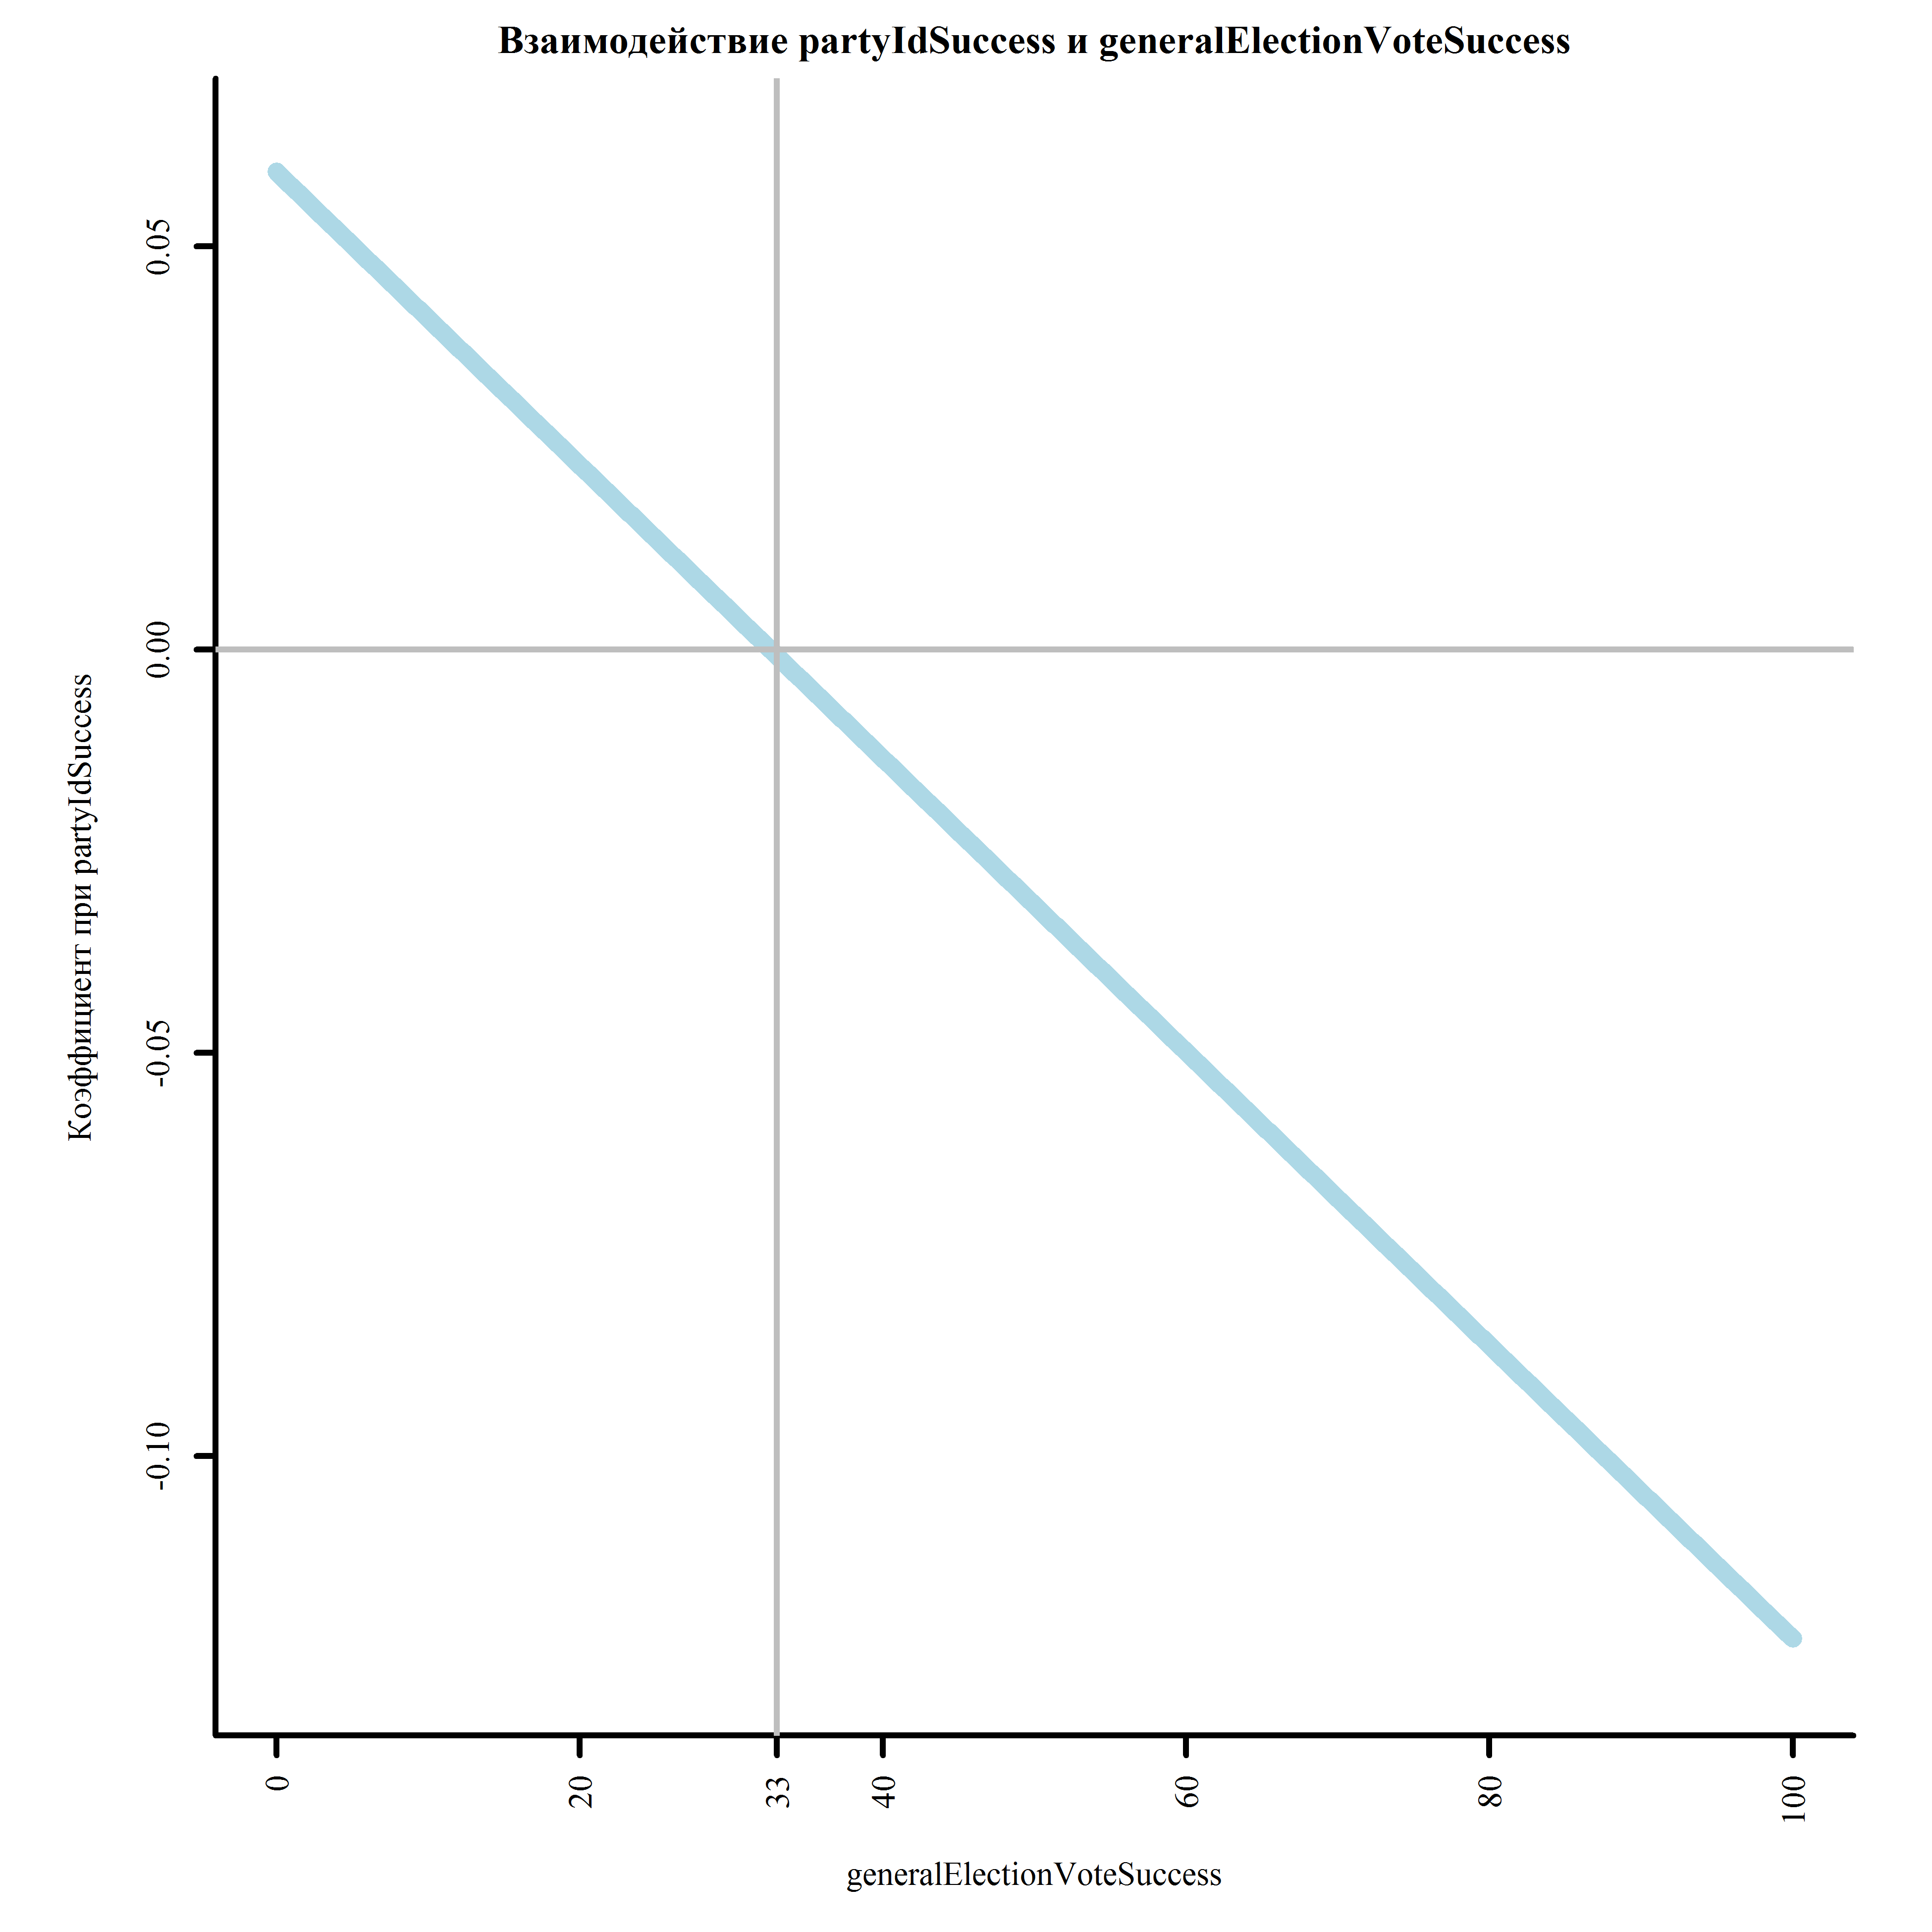

In [31]:
Image('interaction.png', width='50%')

Для интрепретации посчитаем предельные эффекты

Теперь коэффициенты говорят о том, на сколько (в среднем) увеличивается вероятность успеха при увеличении на единицу независимой переменной

Подсчитаем пороговое значение, при котором увеличение partyIdSuccess не увеличивает вероятность<br>
<div align = 'center'>
partyIdSuccess = $\beta_1$ + $\beta_3$ * generalElectionVoteSuccess
</div>
<div align = 'center'>
partyIdSuccess = 0.0056 + (-0.0002) * generalElectionVoteSuccess
</div>
<div align = 'center'>
0 = 0.0056 + (-0.0002) * generalElectionVoteSuccess
</div>
<div align = 'center', style='margin: 20px'>
generalElectionVoteSuccess = $\frac{0.005550522018638351}{0.00017029773201904033}$
</div>
<div align = 'center'>
generalElectionVoteSuccess $\approx$ 33 
</div>

In [32]:
- LME2017H1.margeff[0]/LME2017H1.margeff[2]

32.5930472052192

При generalElectionVoteSuccess = 32.6 => увеличение partyIdSuccess не изменяет вероятность.

При generalElectionVoteSuccess < 32.6 => увеличение partyIdSuccess увеличивает вероятность.

При generalElectionVoteSuccess > 32.6 => увеличение partyIdSuccess уменьшает вероятность.

#### 2015

Без интеракции

In [33]:
logit2015H1_NoInter = smf.logit(formula=formulaH1_NoInter, data = dataW04).fit()
print(logit2015H1_NoInter.summary2())

Optimization terminated successfully.
         Current function value: 0.459039
         Iterations 6
                            Results: Logit
Model:              Logit                Pseudo R-squared: 0.054      
Dependent Variable: DV_hasContradictions AIC:              19263.9314 
Date:               2019-04-30 22:09     BIC:              19303.6861 
No. Observations:   20972                Log-Likelihood:   -9627.0    
Df Model:           4                    LL-Null:          -10171.    
Df Residuals:       20967                LLR p-value:      1.9913e-234
Converged:          1.0000               Scale:            1.0000     
No. Iterations:     6.0000                                            
------------------------------------------------------------------------
               Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------------
Intercept     -0.6606     0.0394   -16.7754   0.0000   -0.7378   -0.

with interaction

In [34]:
logit2015H1_Inter = smf.logit(formula=formulaH1_Inter, data = dataW04.rename(columns = {"generalElectionVoteSuccess": "GEVSuccess", "generalElectionVoteFailure": "GEVFailure"}, inplace=False)).fit()
print(logit2015H1_Inter.summary2())

Optimization terminated successfully.
         Current function value: 0.367348
         Iterations 7
                            Results: Logit
Model:               Logit                Pseudo R-squared: 0.243     
Dependent Variable:  DV_hasContradictions AIC:              15420.0510
Date:                2019-04-30 22:10     BIC:              15467.7566
No. Observations:    20972                Log-Likelihood:   -7704.0   
Df Model:            5                    LL-Null:          -10171.   
Df Residuals:        20966                LLR p-value:      0.0000    
Converged:           1.0000               Scale:            1.0000    
No. Iterations:      7.0000                                           
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Intercept             -3.6482   0.0907 -40.2325 0.0000 -3.8259 -3.4704
PId

Предельные эффекты

In [35]:
LME2015H1 = logit2015H1_Inter.get_margeff()
print(LME2015H1.summary())

         Logit Marginal Effects        
Dep. Variable:     DV_hasContradictions
Method:                            dydx
At:                             overall
                           dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
PIdSuccess                0.0074      0.000     33.780      0.000       0.007       0.008
GEVSuccess                0.0089      0.000     43.783      0.000       0.009       0.009
PIdSuccess:GEVSuccess    -0.0002   3.38e-06    -56.404      0.000      -0.000      -0.000
PIdFailure               -0.0476      0.012     -3.810      0.000      -0.072      -0.023
GEVFailure                0.1219      0.012     10.191      0.000       0.098       0.145


In [36]:
- LME2015H1.margeff[0]/LME2015H1.margeff[2]

38.61530869349035

По 15 году объяснительная сила моделей слабее почти в 2 раза

#### Результаты

$H_1$ подтвердилась.
Это было показано при помощи логистической регрессии.

Появились намёки на вторую гипотезу.

## Гипотеза 2: signal voting

Во время подтверждения гипотезы №1, было выявленно, что существует группа людей, которые имеют партийную принадлежность, голосуют за другую партию, хотя даже мало верят в её успех (думают, что её шансы меньше $\frac{1}{3}$).

Это может выглядеть странным на первый взгляд, но вовзращаюясь к теоретической рамке исследования и гипотезам - это подозрение на $H_2$

Отсечём эту категорию населения и изучим поподробнее

### 2017

In [37]:
signalVotingW12 = dataW12[['partyId', 'GEV','bestOnMII', 'small_mii_cat',
                           'PIdSuccess', 'GEVSuccess']]

Отсекаем ситуацию, когда в победу своей партии избиратель верит больше, чем за которую голосует

In [38]:
signalVotingW12 = signalVotingW12[signalVotingW12['PIdSuccess'] > signalVotingW12['GEVSuccess']]
signalVotingW12 = signalVotingW12.reset_index(drop = True)

Считаем самые крупные вариации комбинаций partyId и generalElectionVote в полученной subsample

In [39]:
def create_PIDvsGEV(data, sep='vs', labelBar=''):
    data = data.reset_index(drop=True)
    for row in tqdm_notebook(range(len(data)), desc = labelBar):
        data.loc[row, 'PIDvsGEV'] = data.loc[row, 'partyId'] + ' ' + sep + ' ' + data.loc[row, 'GEV']
    return data

signalVotingW12 = create_PIDvsGEV(signalVotingW12)
len(signalVotingW12)

1284

Оставляем самые крупные кейсы и самые крупные категории (выводить на график категории со значениями близкими к нулю нет смысла

In [40]:
print(signalVotingW12.PIDvsGEV.value_counts()[:7] / len(signalVotingW12))
largestCasesSV12 = list(signalVotingW12.PIDvsGEV.value_counts()[:7].index)
largestMMI = ['Health', 'Terrorism', 'Economy', 'Immigration', 'Europe']

Labour vs Liberal Democrat                                  0.180685
Labour vs Conservative                                      0.163551
Conservative vs Liberal Democrat                            0.148754
Conservative vs Labour                                      0.098131
Conservative vs United Kingdom Independence Party (UKIP)    0.086449
Labour vs United Kingdom Independence Party (UKIP)          0.062305
Labour vs Green Party                                       0.052181
Name: PIDvsGEV, dtype: float64


Считаем процент каждой категории MMI в каждой паре партий (Идеологически близка vs голосую)

In [41]:
def groupbySV_partyMII(data):
    data = data[['partyId', 'GEV', 'small_mii_cat']]
    aggregation = {
        'small_mii_cat': 'count'
    }

    def percentageCategory(x):
        x['miiPercentage'] = x['freq'] / x['freq'].sum()
        return x

    data = data.groupby(['partyId', 'GEV', 'small_mii_cat']).agg(aggregation).rename(columns = {'small_mii_cat': 'freq'})
    return data.groupby(['partyId', 'GEV']).apply(percentageCategory).reset_index()

In [42]:
SV12groupby = groupbySV_partyMII(signalVotingW12)

SV12groupby = create_PIDvsGEV(SV12groupby)
SV12groupby = SV12groupby[(SV12groupby['PIDvsGEV'].isin(largestCasesSV12)) & (SV12groupby['small_mii_cat'].isin(largestMMI))]

Сокращаем длинные названия партия до аббревиатур для графика

In [43]:
party_abbr = {"Conservative" : "Con", "Labour": "Lab", "Liberal Democrat": "LD",
                          "Green Party": "Grn", "United Kingdom Independence Party (UKIP)": "UKIP",
                          "Scottish National Party (SNP)": "SNP", "Plaid Cymru": "PC"}
SV12groupby = SV12groupby.replace(party_abbr)
SV12groupby = create_PIDvsGEV(SV12groupby, sep='>>>')

SV12groupby['small_mii_cat'] = SV12groupby['small_mii_cat'].astype('str')

#### bar

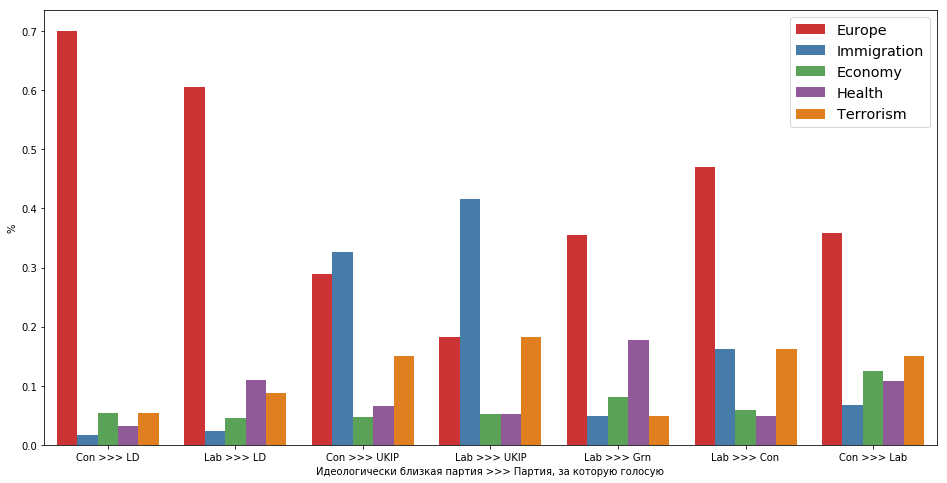

In [44]:
import seaborn as sns
colors = ["gold", "red", "royalblue", "faded green", "dusty purple"]
def SVbarplot(df, listOrder = None):
    fig, ax = plt.subplots()
    fig.set_size_inches(16,8)
    sns.barplot(x = 'PIDvsGEV', y='miiPercentage', data=df, hue='small_mii_cat', ax=ax,
                order=listOrder, palette = sns.color_palette("Set1", 5))
    ax.legend(fontsize = 'x-large')
    ax.set(xlabel='Идеологически близкая партия >>> Партия, за которую голосую', ylabel='%')

SVbarplot(SV12groupby, listOrder = ['Con >>> LD', 'Lab >>> LD', 'Con >>> UKIP', 'Lab >>> UKIP',
                       'Lab >>> Grn', 'Lab >>> Con', 'Con >>> Lab'])
plt.savefig('sv2017.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1);

<hr>

### 2015

In [45]:
signalVotingW04 = dataW04[['partyId', 'GEV','bestOnMII', 'small_mii_cat',
                           'PIdSuccess', 'GEVSuccess']]

signalVotingW04 = signalVotingW04[signalVotingW04['PIdSuccess'] > signalVotingW04['GEVSuccess']]
signalVotingW04 = create_PIDvsGEV(signalVotingW04)
len(signalVotingW04)

1784

In [46]:
print((signalVotingW04.PIDvsGEV.value_counts()/ len(signalVotingW04))[0:5])
largestCasesSV04 = list(signalVotingW04.PIDvsGEV.value_counts()[:5].index)
largestMMI04 = ['Health', 'Terrorism', 'Economy', 'Immigration', 'Inequality']

Conservative vs United Kingdom Independence Party (UKIP)    0.341928
Labour vs United Kingdom Independence Party (UKIP)          0.173767
Labour vs Green Party                                       0.113229
Labour vs Conservative                                      0.063901
Liberal Democrat vs Green Party                             0.040919
Name: PIDvsGEV, dtype: float64


In [47]:
SV04groupby = groupbySV_partyMII(signalVotingW04)
SV04groupby = create_PIDvsGEV(SV04groupby)
SV04groupby = SV04groupby[(SV04groupby['PIDvsGEV'].isin(largestCasesSV04)) & (SV04groupby['small_mii_cat'].isin(largestMMI04))]

SV04groupby = SV04groupby.replace(party_abbr)

SV04groupby = create_PIDvsGEV(SV04groupby, sep='>>>')

SV04groupby['small_mii_cat'] = SV04groupby['small_mii_cat'].astype('str')

#### bar

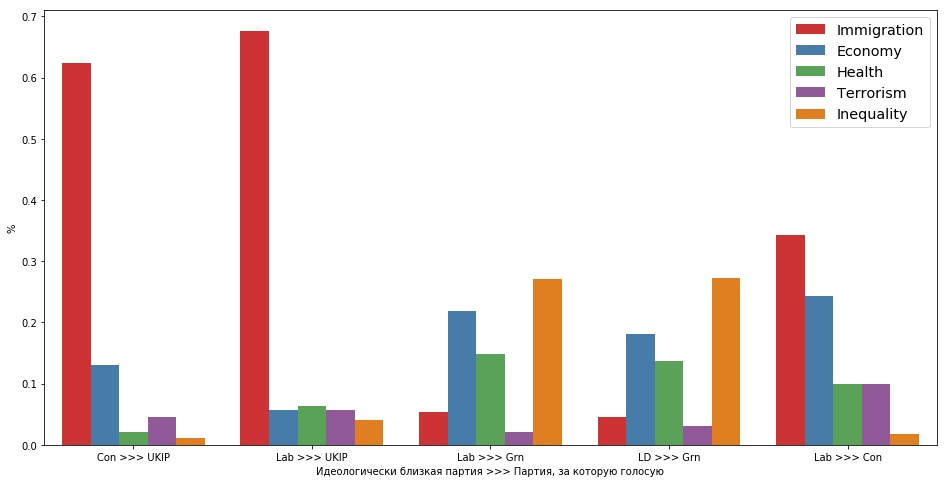

In [48]:
SVbarplot(SV04groupby, listOrder=['Con >>> UKIP','Lab >>> UKIP',
                                  'Lab >>> Grn', 'LD >>> Grn', 'Lab >>> Con'])
plt.savefig('sv2015.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1);

## Гипотеза 3: экономическое голосование

* changeEconomy - Do you think that Economy is getting better, getting worse or staying about the same?

* econPersonalRetro - How does the *financial situation of your household* now compare with what it was 12 months ago?

* econGenRetro - How do you think the *general economic situation in this country* has changed over the *last 12 months*?

### 2017

* isPartyIdCon - является ли партия, которая близка идеологически избирателю, партией Консерваторов

In [50]:
def create_isConservative(data):
    for row in tqdm_notebook(range(len(data))):
        if data.loc[row, "partyId"] == 'Conservative':
            data.loc[row, 'isPIdCon'] = 1
        else:
            data.loc[row, 'isPIdCon'] = 0
    return data

In [51]:
dataW12 = create_isConservative(dataW12)

In [52]:
economicVoting12 = dataW12[['partyId', 'GEV', 'DV_hasContradictions',
                            'PIdSuccess', 'GEVSuccess',
                            'PIdFailure', 'GEVFailure',
                            'changeEconomy', 'econPersonal', 'econGen', 'isPIdCon']]

In [53]:
logit2017EV = smf.logit(formula='DV_hasContradictions ~ C(isPIdCon)*changeEconomy', data = economicVoting12).fit()
print(logit2017EV.summary2())

Optimization terminated successfully.
         Current function value: 0.465028
         Iterations 7
                                 Results: Logit
Model:                  Logit                    Pseudo R-squared:     0.115     
Dependent Variable:     DV_hasContradictions     AIC:                  22156.3667
Date:                   2019-04-30 22:11         BIC:                  22188.6789
No. Observations:       23814                    Log-Likelihood:       -11074.   
Df Model:               3                        LL-Null:              -12512.   
Df Residuals:           23810                    LLR p-value:          0.0000    
Converged:              1.0000                   Scale:                1.0000    
No. Iterations:         7.0000                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------

Посмотрим на людей, которые удовлетворены текущим состоянием экономики (но ассоциируют себя не с Консерваторами). А точнее только тех, кто головал вопреки предпочтения.

In [54]:
evNotConPOS = economicVoting12[(economicVoting12['DV_hasContradictions'] == 1) & (economicVoting12['partyId'] != 'Conservative') & (economicVoting12['changeEconomy'] > 0)]
(evNotConPOS['GEV'].value_counts() / len(evNotConPOS)) * 100

Conservative                                81.951872
Labour                                       7.085561
Liberal Democrat                             4.545455
United Kingdom Independence Party (UKIP)     2.941176
Other                                        1.203209
Scottish National Party (SNP)                1.069519
Green Party                                  0.935829
Plaid Cymru                                  0.267380
Don't know                                   0.000000
I would not vote                             0.000000
Name: GEV, dtype: float64

In [55]:
evNotConOnly2 = economicVoting12[(economicVoting12['DV_hasContradictions'] == 1) & (economicVoting12['partyId'] != 'Conservative') & (economicVoting12['changeEconomy'] > 1)]
(evNotConOnly2['GEV'].value_counts() / len(evNotConOnly2)) * 100

Conservative                                96.8750
United Kingdom Independence Party (UKIP)     1.5625
Labour                                       1.5625
Don't know                                   0.0000
Other                                        0.0000
Green Party                                  0.0000
Plaid Cymru                                  0.0000
Scottish National Party (SNP)                0.0000
Liberal Democrat                             0.0000
I would not vote                             0.0000
Name: GEV, dtype: float64

### 2015

In [56]:
dataW04 = create_isConservative(dataW04)

In [57]:
economicVoting04 = dataW04[['partyId', 'GEV', 'DV_hasContradictions',
                            'PIdSuccess', 'GEVSuccess', 'PIdFailure', 'GEVFailure',
                            'changeEconomy', 'econPersonal', 'econGen', 'isPIdCon']]

In [58]:
logit2015EV = smf.logit(formula='DV_hasContradictions ~ C(isPIdCon)*changeEconomy', data = economicVoting04).fit()
print(logit2015EV.summary2())

Optimization terminated successfully.
         Current function value: 0.491393
         Iterations 6
                                 Results: Logit
Model:                   Logit                   Pseudo R-squared:    0.023      
Dependent Variable:      DV_hasContradictions    AIC:                 22008.6616 
Date:                    2019-04-30 22:12        BIC:                 22040.7264 
No. Observations:        22386                   Log-Likelihood:      -11000.    
Df Model:                3                       LL-Null:             -11258.    
Df Residuals:            22382                   LLR p-value:         1.6150e-111
Converged:               1.0000                  Scale:               1.0000     
No. Iterations:          6.0000                                                  
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------

Посмотрим на людей, которые удовлетворены текущим состоянием экономики (но ассоциируют себя не с Консерваторами). А точнее только тех, кто головал вопреки предпочтения.

In [59]:
evNotConPOS04 = economicVoting04[(economicVoting04['DV_hasContradictions'] == 1) & (economicVoting04['partyId'] != 'Conservative') & (economicVoting04['changeEconomy'] > 0)]
(evNotConPOS04['GEV'].value_counts() / len(evNotConPOS04)) * 100

Conservative                                43.122363
United Kingdom Independence Party (UKIP)    18.143460
Labour                                      13.080169
Green Party                                  9.198312
Liberal Democrat                             8.016878
Scottish National Party (SNP)                6.075949
Plaid Cymru                                  1.181435
Other                                        1.012658
British National Party (BNP)                 0.168776
Don't know                                   0.000000
I would not vote                             0.000000
Name: GEV, dtype: float64

In [60]:
evNotConOnlyTwo04 = economicVoting04[(economicVoting04['DV_hasContradictions'] == 1) & (economicVoting04['partyId'] != 'Conservative') & (economicVoting04['changeEconomy'] > 1)]
(evNotConOnlyTwo04['GEV'].value_counts() / len(evNotConOnlyTwo04)) * 100

Conservative                                79.591837
United Kingdom Independence Party (UKIP)     9.183673
Labour                                       5.102041
Liberal Democrat                             3.061224
Scottish National Party (SNP)                2.040816
Plaid Cymru                                  1.020408
Don't know                                   0.000000
Other                                        0.000000
British National Party (BNP)                 0.000000
Green Party                                  0.000000
I would not vote                             0.000000
Name: GEV, dtype: float64

## Модель, включающая гипотезу 1 и 3

### Accuracy metrics. Predictions. 2017

In [61]:
logit2017H_1_3 = smf.logit(formula='DV_hasContradictions ~ PIdSuccess * GEVSuccess + PIdFailure + GEVFailure + C(isPIdCon)*changeEconomy + gender + country', data = dataW12).fit()
print(logit2017H_1_3.summary2())

Optimization terminated successfully.
         Current function value: 0.288922
         Iterations 8
                                 Results: Logit
Model:                  Logit                    Pseudo R-squared:     0.435     
Dependent Variable:     DV_hasContradictions     AIC:                  12699.5787
Date:                   2019-04-30 22:12         BIC:                  12795.5293
No. Observations:       21936                    Log-Likelihood:       -6337.8   
Df Model:               11                       LL-Null:              -11227.   
Df Residuals:           21924                    LLR p-value:          0.0000    
Converged:              1.0000                   Scale:                1.0000    
No. Iterations:         8.0000                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------

In [62]:
dataW12_4predict = dataW12[['DV_hasContradictions', 'PIdSuccess', 'GEVSuccess',
                            'PIdFailure', 'GEVFailure',
                            'isPIdCon', 'changeEconomy', 'gender', 'country']]
dataW12_4predict = dataW12_4predict.dropna()
predictedProb = logit2017H_1_3.predict(dataW12_4predict)

In [65]:
from sklearn.metrics import precision_recall_curve
def Find_Optimal_Cutoff(target, predicted):
    precisions, recalls, thresholds = precision_recall_curve(target, predicted)
#     optimalIndex = np.argmax(2 * (precisions * recalls) / (precisions + recalls)) #f1-score
    optimalIndex = np.argmin(np.abs(precisions - recalls)) #этот вариант находит пересечение двух кривых
    return thresholds[optimalIndex]

Оптимальный threshold может находится по-разному: roc-curve, f1-score или же пересечение precision-recall curve.

Выбран последний вариант (btw: f1-score в данной точке равно 69, когда максильное значение всего лишь чуть больше полпроцентного пункта)

In [66]:
optimal_threshold = Find_Optimal_Cutoff(dataW12_4predict['DV_hasContradictions'], predictedProb)
print('Optimal threshold is', round(optimal_threshold, 3))

Optimal threshold is 0.342


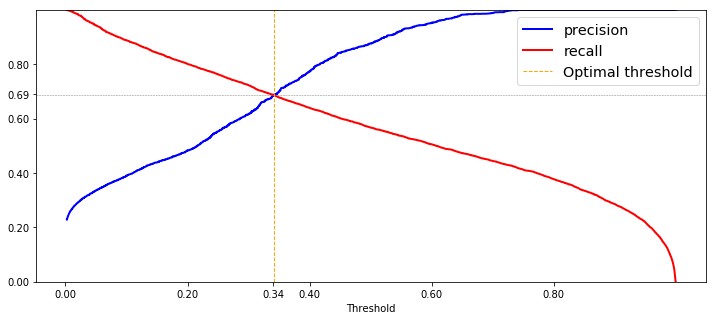

In [67]:
def plot_prec_recall_vs_tresh(y_true, y_predProb):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_predProb)
    
    OT_ind = np.argmin(np.abs(precisions - recalls))
    optimal_threshold = thresholds[OT_ind]
    precOT = precisions[OT_ind]
#     recOT = recalls[OT_ind]
    
    plt.figure(figsize=(12,5))
    plt.plot(thresholds, precisions[:-1], 'b-', linewidth = 2, label='precision')
    plt.plot(thresholds, recalls[:-1], 'r-', linewidth = 2, label = 'recall')
    plt.axvline(x=optimal_threshold, label = 'Optimal threshold', color='orange', linewidth=1, linestyle='--')
    plt.axhline(y=precOT, color='grey', linewidth=0.5, linestyle='--')
    
    plt.xlabel('Threshold')
    plt.xticks(np.append(np.arange(0,1,0.2), round(optimal_threshold, 2)))
    plt.yticks(np.append(np.arange(0,1,0.2), round(precOT, 2)))
    
    plt.legend(loc='upper right', fontsize = 'x-large')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(dataW12_4predict['DV_hasContradictions'], predictedProb)

plt.savefig('sensRecall2017.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [68]:
predictedBinary = (predictedProb > optimal_threshold) * 1

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(confusion_matrix(y_true=dataW12_4predict['DV_hasContradictions'], y_pred=predictedBinary))

print('Accuracy: ', accuracy_score(y_true=dataW12_4predict['DV_hasContradictions'], y_pred=predictedBinary))
print('Recall: ', recall_score(y_true=dataW12_4predict['DV_hasContradictions'], y_pred=predictedBinary))
print('Precision: ', precision_score(y_true=dataW12_4predict['DV_hasContradictions'], y_pred=predictedBinary))

[[15954  1411]
 [ 1434  3137]]
Accuracy:  0.8703045222465354
Recall:  0.6862830890395974
Precision:  0.6897537379067722


In [ ]:
# from pandas_ml import ConfusionMatrix
# cm = ConfusionMatrix(y_true=dataW12_4predict['DV_hasContradictions'], y_pred=predictedBinary)
# cm.plot()

### Accuracy metrics. Predictions. 2015

In [70]:
logit2015H_1_3 = smf.logit(formula='DV_hasContradictions ~ PIdSuccess * GEVSuccess + PIdFailure + GEVFailure + C(isPIdCon)*changeEconomy', data = economicVoting04).fit()
print(logit2015H_1_3.summary2())

Optimization terminated successfully.
         Current function value: 0.361724
         Iterations 7
                                 Results: Logit
Model:                  Logit                    Pseudo R-squared:     0.256     
Dependent Variable:     DV_hasContradictions     AIC:                  14995.5553
Date:                   2019-04-30 22:13         BIC:                  15066.9976
No. Observations:       20703                    Log-Likelihood:       -7488.8   
Df Model:               8                        LL-Null:              -10061.   
Df Residuals:           20694                    LLR p-value:          0.0000    
Converged:              1.0000                   Scale:                1.0000    
No. Iterations:         7.0000                                                   
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------

In [71]:
dataW04_4predict = dataW04[['DV_hasContradictions', 'PIdSuccess', 'GEVSuccess',
                            'PIdFailure', 'GEVFailure',
                            'isPIdCon', 'changeEconomy']]
dataW04_4predict = dataW04_4predict.dropna()
predicted2015Prob = logit2015H_1_3.predict(dataW04_4predict)

In [72]:
optimal_threshold2015 = Find_Optimal_Cutoff(dataW04_4predict['DV_hasContradictions'], predicted2015Prob)
print('Optimal threshold is', round(optimal_threshold2015, 3))

Optimal threshold is 0.319


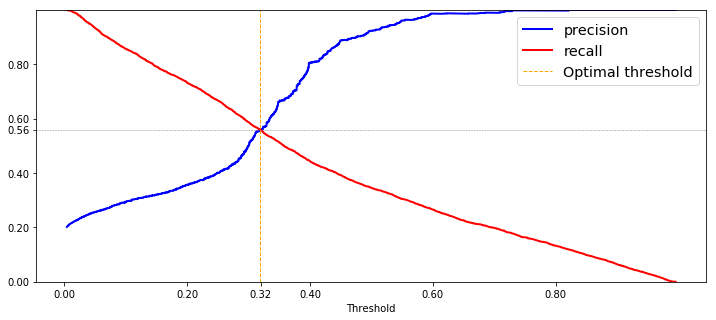

In [73]:
plot_prec_recall_vs_tresh(dataW04_4predict['DV_hasContradictions'], predicted2015Prob)

plt.savefig('sensRecall2015.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [74]:
predictedBinary2015 = (predicted2015Prob > optimal_threshold2015) * 1

In [75]:
print(confusion_matrix(y_true=dataW04_4predict['DV_hasContradictions'], y_pred=predictedBinary2015))

print('Accuracy: ', accuracy_score(y_true=dataW04_4predict['DV_hasContradictions'], y_pred=predictedBinary2015))
print('Recall: ', recall_score(y_true=dataW04_4predict['DV_hasContradictions'], y_pred=predictedBinary2015))
print('Precision: ', precision_score(y_true=dataW04_4predict['DV_hasContradictions'], y_pred=predictedBinary2015))

[[15044  1729]
 [ 1730  2200]]
Accuracy:  0.8329227648166933
Recall:  0.5597964376590331
Precision:  0.5599389157546449


## Гипотеза № 4

In [76]:
selectedVar = ['partyId', 'GEV', 'mii', 'bestOnMII', 'mii_cat', 'small_mii_cat',
               'handleMIICon', 'handleMIILab', 'handleMIILD', 'handleMIIUKIP', 'handleMIIGrn',
               'DV_hasContradictions']
MIIdataW12 = dataW12[selectedVar]
MIIdataW04 = dataW04[selectedVar] 

In [77]:
party_abbr_handle = {"Conservative" : "Con", "Labour": "Lab", "Liberal Democrat": "LD",
                     "Green Party": "Grn", "United Kingdom Independence Party (UKIP)": "UKIP"}

def makeHandleVars(data, labelBar=''):
    for row in tqdm_notebook(range(len(data)), desc = labelBar):
        try:
            if data.loc[row, "partyId"] in party_abbr_handle:
                data.loc[row, "PIdHandleMII"] = data.loc[row,"handleMII" + party_abbr_handle[data.loc[row, "partyId"]]]

            if data.loc[row, "GEV"] in party_abbr_handle:
                data.loc[row, "GEVHandleMII"] = data.loc[row,"handleMII" + party_abbr_handle[data.loc[row, "GEV"]]]
        except BaseException as error:
            print(error)
            print("Возникли проблемы со строчкой № ", row)
    return data

In [78]:
MIIdataW12 = makeHandleVars(MIIdataW12, labelBar='2017')
MIIdataW04 = makeHandleVars(MIIdataW04, labelBar='2015')

In [79]:
MIIdataW12 = MIIdataW12.dropna(subset=["PIdHandleMII", "GEVHandleMII"]).reset_index(drop = True)
MIIdataW04 = MIIdataW04.dropna(subset=["PIdHandleMII", "GEVHandleMII"]).reset_index(drop = True)

In [80]:
print(MIIdataW12['DV_hasContradictions'].value_counts())

print(MIIdataW04['DV_hasContradictions'].value_counts())

0    3824
1     993
Name: DV_hasContradictions, dtype: int64
0    3584
1     821
Name: DV_hasContradictions, dtype: int64


In [81]:
MIIdataW12['partyId'] = MIIdataW12['partyId'].astype('str')

miiLogitW12 = smf.logit(formula='DV_hasContradictions~PIdHandleMII+GEVHandleMII', data=MIIdataW12).fit()
print(miiLogitW12.summary2())

Optimization terminated successfully.
         Current function value: 0.444537
         Iterations 6
                            Results: Logit
Model:              Logit                Pseudo R-squared: 0.126      
Dependent Variable: DV_hasContradictions AIC:              4288.6701  
Date:               2019-04-30 22:18     BIC:              4308.1098  
No. Observations:   4817                 Log-Likelihood:   -2141.3    
Df Model:           2                    LL-Null:          -2450.9    
Df Residuals:       4814                 LLR p-value:      3.5800e-135
Converged:          1.0000               Scale:            1.0000     
No. Iterations:     6.0000                                            
-----------------------------------------------------------------------
                   Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------------
Intercept          0.3479    0.1182    2.9426  0.0033   0.1162   0.5797

In [82]:
MIIdataW04['partyId'] = MIIdataW04['partyId'].astype('str')

miiLogitW04 = smf.logit(formula='DV_hasContradictions~PIdHandleMII+GEVHandleMII', data=MIIdataW04).fit()
print(miiLogitW04.summary2())

Optimization terminated successfully.
         Current function value: 0.386415
         Iterations 7
                            Results: Logit
Model:              Logit                Pseudo R-squared: 0.197      
Dependent Variable: DV_hasContradictions AIC:              3410.3202  
Date:               2019-04-30 22:18     BIC:              3429.4917  
No. Observations:   4405                 Log-Likelihood:   -1702.2    
Df Model:           2                    LL-Null:          -2118.5    
Df Residuals:       4402                 LLR p-value:      1.5404e-181
Converged:          1.0000               Scale:            1.0000     
No. Iterations:     7.0000                                            
-----------------------------------------------------------------------
                   Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------------
Intercept         -0.5880    0.1182   -4.9738  0.0000  -0.8197  -0.3563